In [24]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
uber_df = pd.read_csv("C:\\Users\\SHRIHITA RANVEERKAR\\New folder (2)//uberdrive.csv")

In [25]:
uber_df.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [26]:
uber_df.size

8092

In [28]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [29]:
uber_df.isnull().values.any()

True

In [30]:
uber_df.isnull().values.sum()

507

In [31]:
df = uber_df.dropna()
df.isnull().values.any()

False

In [32]:
uber_df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [33]:
df.describe()

,MILES*
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [34]:
un_start_destination = uber_df["START*"].dropna()
unique_start = set(un_start_destination)
unique_start

{'Agnew',
 'Almond',
 'Apex',
 'Arabi',
 'Arlington',
 'Arlington Park at Amberly',
 'Asheville',
 'Austin',
 'Banner Elk',
 'Bellevue',
 'Berkeley',
 'Boone',
 'Briar Meadow',
 'Bryson City',
 'Burtrose',
 'CBD',
 'Capitol One',
 'Cary',
 'Central',
 'Chalmette',
 'Chapel Hill',
 'Chessington',
 'College Avenue',
 'Colombo',
 'Columbia Heights',
 'Congress Ave District',
 'Connecticut Avenue',
 'Convention Center District',
 'Cory',
 'Couples Glen',
 'Covington',
 'Coxville',
 'Daytona Beach',
 'Downtown',
 'Durham',
 'Eagan Park',
 'Eagle Rock',
 'East Austin',
 'East Elmhurst',
 'East Harlem',
 'Eastgate',
 'Edgehill Farms',
 'El Cerrito',
 'Elk Park',
 'Elmhurst',
 'Emeryville',
 'Fairmont',
 'Farmington Woods',
 'Fayetteville Street',
 'Financial District',
 'Flatiron District',
 'Florence',
 'Fort Pierce',
 'Fuquay-Varina',
 'Galveston',
 'Gampaha',
 'Georgian Acres',
 'Gulfton',
 'Hayesville',
 'Hazelwood',
 "Hell's Kitchen",
 'Heritage Pines',
 'Holly Springs',
 'Houston',
 'Hu

In [35]:
len(unique_start)

176

In [36]:
stop_destination = uber_df["STOP*"].dropna()
unique_stop = set(stop_destination)
len(unique_stop)

187

In [37]:
uber_df[uber_df['START*']=='San Francisco']

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


In [39]:
starting_point= uber_df["START*"].dropna()
df = pd.DataFrame(starting_point.value_counts())
df.sort_values(["START*"], ascending = False)

df = df.reset_index()
df = df.rename(columns = {'index':'starting_destination', 'START*':'Count'})
df.loc[df['Count']== max(df['Count'])]

,starting_destination,Count
0,Cary,201


In [43]:
stopping_point= uber_df["STOP*"].dropna()
df = pd.DataFrame(stopping_point.value_counts())
df.sort_values(["STOP*"], ascending = False)

df = df.reset_index()
df = df.rename(columns = {'index':'stopping_destination', 'STOP*':'Count'})
df.loc[df['Count']== max(df['Count'])] 

,stopping_destination,Count
0,Cary,203


In [48]:
df = uber_df.dropna()
df = pd.DataFrame(df.groupby(['START*', 'STOP*']).size())
df = df.rename(columns = {0:'Count'})
df = df.sort_values(['Count'], ascending = False)
df.loc[df['Count']== max(df['Count'])]

,,Count
START*,STOP*,
Cary,Morrisville,52


In [49]:
print(np.array(uber_df['PURPOSE*'].dropna().unique()))
uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

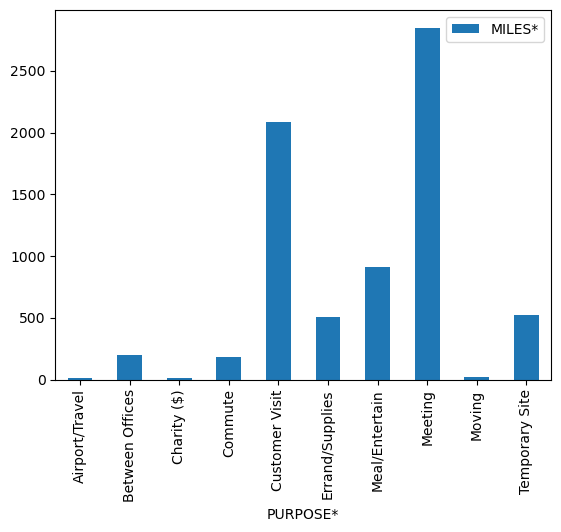

In [51]:
df = pd.DataFrame(uber_df['MILES*'].groupby(uber_df['PURPOSE*']).sum())
df.plot(kind = 'bar')
plt.show()

<Axes: xlabel='MILES*', ylabel='PURPOSE*'>

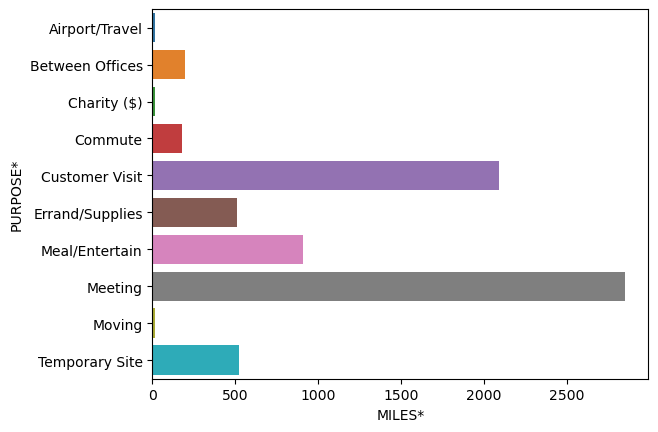

In [53]:
df = df.reset_index()
sns.barplot(x = df['MILES*'], y = df['PURPOSE*'])

In [54]:
df

,PURPOSE*,MILES*
0,Airport/Travel,16.5
1,Between Offices,197.0
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,2089.5
5,Errand/Supplies,508.0
6,Meal/Entertain,911.7
7,Meeting,2851.3
8,Moving,18.2
9,Temporary Site,523.7


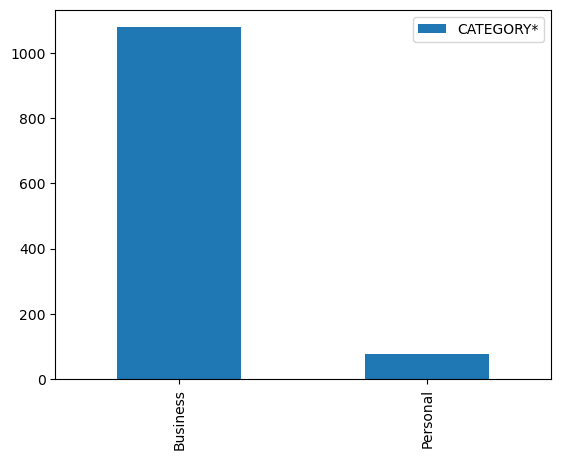

,CATEGORY*
Business,1078
Personal,77


In [55]:
uber_df.head()
df = pd.DataFrame(uber_df['CATEGORY*'].value_counts())
df.reset_index()
df.plot(kind = 'bar')
plt.show()
df

In [56]:
df = uber_df.groupby(['CATEGORY*']).sum()
Business = df.iloc[0,0]/(df.iloc[0,0] + df.iloc[1,0])
Personal = df.iloc[0,0]/(df.iloc[0,0] + df.iloc[1,0])

print("Business:", Business)
print("personal:", Personal)

Business: 0.9411947856153776
personal: 0.9411947856153776


C:\Users\SHRIHITA RANVEERKAR\AppData\Local\Temp\ipykernel_12720\1669239497.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = uber_df.groupby(['CATEGORY*']).sum()
